# Paper: Endemic and epidemic dynamics of cholera: the role of the aquatic reservoir

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

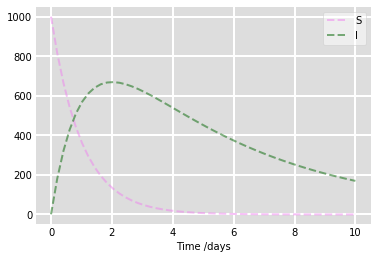

In [2]:
# Initial conditions
S0 = 1000 #10000
I0 = 1
B0 = 10e6 #10e7 

# A grid of time points (in days)
t = np.linspace(0, 10, 50) 

#parameters
H = 1000 #10000
n = 0.0001
a = 1
K = 106
r = 0.2
e = 10

# The SIR model differential equations.
def deriv(y, t , H,n ,a ,K ,r ,e):
    S, I, B = y
    
    lambdda = B / (K + B)

    dSdt = n * (H - S) - a * lambdda * S
    dIdt = a * lambdda * S - r * I
    dBdt = B * (-0.33) + e * I

    return dSdt, dIdt, dBdt

# Initial conditions vector
y0 = S0, I0, B0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(H, n ,a ,K ,r ,e))
S, I, B = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='S', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='I', linestyle='dashed')
# ax.plot(t, B, 'blue', alpha=0.5, lw=2, label='B', linestyle='dashed')

ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, S, I, B]) 

# np.savetxt("cholera.csv", a, delimiter=",")